In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
pd.options.mode.chained_assignment = None   # this is turning off the SettingWithCopyWarning that come up every 
# time I set individual row values using something like df.column[df.othercolumn == filtervalue] = newvalue
# this warning has well-documented false positives and from always checking the results after I use this method, 
# I know that I am setting values in the original df correctly and can safely ignore this warning. 

In [2]:
from glob import glob
import re

In [3]:
glob('*2*undup*.csv')

['20190212_search2_unduplicated_seek_jobs.csv',
 '20190214_search2_unduped_with_classifications.csv']

In [4]:
jobdf = pd.read_csv('20190214_search2_unduped_with_classifications.csv', index_col=0)
jobdf.head(3)

,company,error,joburl_x,location_area,location_big,salary,searchterm,seekID,srch_date,srch_pos,templatetext,title,jobClassification,jobSubClassification,jobTitle,joburl_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FIRESOFT Consulting,nobullets,/job/38248336?type=standard&searchrequesttoken...,"CBD, Inner West & Eastern Suburbs",Sydney,not_listed,data-science,38248336.0,20190202.0,1_0,\nHead of Data Science Engineering & Products ...,Head of Data Science Engineering & Products,Information & Communication Technology,Management,Head of Data Science Engineering & Products,/job/38248336?type=standard&searchrequesttoken...
2,Bluefin Resources Pty Limited,nobullets,/job/38214944?type=standard&searchrequesttoken...,"CBD, Inner West & Eastern Suburbs",Sydney,not_listed,data-science,38214944.0,20190202.0,1_1,\nMy client is a leading institution with ongo...,Manager | Analytics & Data Science,Science & Technology,"Mathematics, Statistics & Information Sciences",Manager | Analytics & Data Science,/job/38214944?type=standard&searchrequesttoken...


In [5]:
jobdf.drop(index=0, columns='joburl_y', inplace=True)
jobdf.reset_index(drop=True, inplace=True)
jobdf.rename(columns={'joburl_x':'joburl'}, inplace=True)
jobdf.head(3)

,company,error,joburl,location_area,location_big,salary,searchterm,seekID,srch_date,srch_pos,templatetext,title,jobClassification,jobSubClassification,jobTitle
0,FIRESOFT Consulting,nobullets,/job/38248336?type=standard&searchrequesttoken...,"CBD, Inner West & Eastern Suburbs",Sydney,not_listed,data-science,38248336.0,20190202.0,1_0,\nHead of Data Science Engineering & Products ...,Head of Data Science Engineering & Products,Information & Communication Technology,Management,Head of Data Science Engineering & Products
1,Bluefin Resources Pty Limited,nobullets,/job/38214944?type=standard&searchrequesttoken...,"CBD, Inner West & Eastern Suburbs",Sydney,not_listed,data-science,38214944.0,20190202.0,1_1,\nMy client is a leading institution with ongo...,Manager | Analytics & Data Science,Science & Technology,"Mathematics, Statistics & Information Sciences",Manager | Analytics & Data Science
2,GOW Recruitment,nobullets,/job/38196050?type=standard&searchrequesttoken...,not_listed,Melbourne,not_listed,data-science,38196050.0,20190202.0,1_3,\nExpressions of Interests Recruiting for mult...,"Data Science, Data Engineers, Data Analytics -...",Information & Communication Technology,Other,"Data Science, Data Engineers, Data Analytics -..."


In [6]:
print(len(jobdf))
print(len(jobdf[jobdf.salary != 'not_listed']))

8027
2817


In [55]:
salparse = jobdf[['seekID', 'salary']][jobdf.salary != 'not_listed'].copy()
salparse.head(3)

,seekID,salary
3,38194336.0,"$110,172.00 - $119,921.00"
4,38194327.0,"$110,172.00 - $119,921.00"
5,38194322.0,"$110,172.00 - $119,921.00"


In [7]:
jobdf.salary.value_counts()[1:]

Competitive                                           37
$Neg                                                  27
$60,000 - $64,999                                     17
competitive                                           16
Super                                                 15
$150K - $200K + Super (14%) + Uncapped Commissions    14
$65,000 - $69,999                                     12
Competitive Salary                                    11
$81,125 - $90,928 p.a. (plus 15.4% super)             11
super                                                 11
$96,644 - $113,766 p.a. (plus 15.4% super)            10
superannuation                                        10
$170-190K Base+Super+Bens                              9
Competitive Salary Package                             9
AU$111,663 - AU$130,848 plus up to 15.4% super         9
$50,000 - $54,999                                      8
Great super! Great leave! Great team! Join CQU!        8
$79,206 (plus 15.4% super)     

In [10]:
testset = list(jobdf.salary.unique())
testset[:6]

['not_listed',
 '$110,172.00 - $119,921.00',
 'Competitive Salary + Bonus + Benefits',
 '$170K+Super+ Bonus',
 'Competitive Salary + Bonus!',
 'Very Competitive + Bonus']

In [19]:
pattern = re.compile(r'\d+[\.,]*\d+')
pattern

re.compile(r'\d+[\.,]*\d+', re.UNICODE)

In [ ]:
re.findall(pattern, testset[1])

In [8]:
def grab_regex(instring, pattern):
    found = re.findall(re.compile(pattern), instring)
    if len(found) >= 1:
        return found[0]
#     elif len(found) > 1:
#         return '_many_'
    else:
        return np.NaN

In [58]:
salparse.salary.apply(grab_regex, args=(r'\W',)).unique()

array(['$', ' ', nan, '£', '+', ',', '.', '-', "'", '/', '%', '–', '\t',
       '#', '~', '!'], dtype=object)

In [59]:
salparse[salparse.salary.apply(grab_regex, args=(r'#')).notnull()] # not going to worry about that one

,seekID,salary
2603,38267274.0,"$84,019 &#8211; $95,329 + super"
2604,38267275.0,"$84,019 &#8211; $95,329 + super"
2907,38275626.0,#HealthierLongerBetterLives #AIACareers
3031,38237248.0,"$51,717 &#8211; $66,414 + Super"
3032,38237247.0,"$51,717 &#8211; $66,414 + Super"
4416,38283162.0,#HealthierLongerBetterLives #AIACareers
5544,38159454.0,#HealthierLongerBetterLives #AIACareers
7381,38167682.0,#HealthierLongerBetterLives #AIACareers
7399,38181092.0,#HealthierLongerBetterLives #AIACareers


In [60]:
salparse[salparse.salary.apply(grab_regex, args=(r" \d ",)).notnull()]

,seekID,salary
238,38024092.0,+ 5 Weeks Annual Leave + Company Bonus
1050,38095030.0,"Band 7 $95,492 - $106,853+ RDO + Super"
1051,38095031.0,"Band 7 $95,492 - $106,853+ RDO + Super"
1514,38178422.0,Base + super + 10% annual bonus + 5 weeks leav...
2910,38284060.0,"$87,249-$95,695 HEW 7 (plus 9.5% superannuation)"
2911,38284059.0,"$87,249-$95,695 HEW 7 (plus 9.5% superannuation)"
2924,38307112.0,"$98,155-$108,345 HEW 8 (plus 9.5% superannuation)"
2925,38307111.0,"$98,155-$108,345 HEW 8 (plus 9.5% superannuation)"
2971,38307077.0,"$98,155-$108,345 HEW 8 (plus 9.5% superannuation)"
2972,38307078.0,"$98,155-$108,345 HEW 8 (plus 9.5% superannuation)"


In [61]:
# am rounding all decimals up, can go through strings with multiple decimal numbers
def rgx_round(instring):
    dec_num = re.compile(r"\d+\.\d+")
    found = re.findall(dec_num, instring)
    if len(found) > 0:
        new = [str(int(np.ceil(float(f)))) for f in found]
        for f,n in zip(found, new):
            instring = instring.replace(f,n)
    return instring

In [62]:
# salparse.cln.apply(rgx_round)[salparse.cln.str.contains(r"\d+\.\d+")]
# salparse.cln[salparse.salary.str.contains(r"\d+\.\d+")]

In [63]:
salparse['cln'] = salparse.salary.str.lower()

for ch in [r'$',r',',r'£', r'.00',r"'"]:
    salparse.cln = salparse.cln.str.replace(ch,'', regex=False)

salparse.cln = salparse.cln.apply(rgx_round)
salparse.cln = salparse.cln.str.replace(r" \d "," ", regex=True)  # from cell above, this is getting rid of superfluous numbers
salparse.cln = salparse.cln.str.replace(r"[\d.]+%", "") # getting rid of the super % values as they confuse things
salparse

,seekID,salary,cln
3,38194336.0,"$110,172.00 - $119,921.00",110172 - 119921
4,38194327.0,"$110,172.00 - $119,921.00",110172 - 119921
5,38194322.0,"$110,172.00 - $119,921.00",110172 - 119921
6,38194317.0,"$110,172.00 - $119,921.00",110172 - 119921
7,38184716.0,"$110,172.00 - $119,921.00",110172 - 119921
8,38184709.0,"$110,172.00 - $119,921.00",110172 - 119921
9,38184701.0,"$110,172.00 - $119,921.00",110172 - 119921
10,38184695.0,"$110,172.00 - $119,921.00",110172 - 119921
12,38170545.0,Competitive Salary + Bonus + Benefits,competitive salary + bonus + benefits
13,38170544.0,Competitive Salary + Bonus + Benefits,competitive salary + bonus + benefits


In [64]:
# trying all the combinations that are coming up for the timescale of the salary value 
salparse['per'] = salparse.cln.apply(grab_regex, args=(r"(p\.\w\.)|( per \w+)|(p\w )|\d(/\w+) |(p*[/ ]+[hd])",))
# the last pattern (p*[/ ]+[hd]) actually picks up a few words that are not related but on checking it doesn't
# matter because none of the false positives have any other numeric pay figure in them so won't be used.
salparse['per'] = salparse.per.apply(lambda x : [a for a in x if len(a) > 0][0] if pd.notnull(x) else np.NaN)

for ch in ['.',' ','er','ay','our','r','nnum', 'ye', 'plus']:
    salparse.per = salparse.per.str.replace(ch,'', regex=False)
salparse.per = salparse.per.str.replace('/','p', regex=False)
salparse.per = salparse.per.str.replace('pp','p', regex=False)
salparse.per = salparse.per.str.replace('pel1','pa', regex=False)  # individual cases that pop up
salparse.per[salparse.per == 'pskills'] = np.NaN
salparse.per.value_counts()

pa    555
pd    318
ph    217
d     104
h      27
pm      2
p       2
Name: per, dtype: int64

In [65]:
salparse[(salparse.per == 'p') & salparse.per.notnull()]

,seekID,salary,cln,per
2480,38278747.0,"$71,509 - $90,215 per plus superannuation",71509 - 90215 per plus superannuation,p
2481,38278746.0,"$71,509 - $90,215 per plus superannuation",71509 - 90215 per plus superannuation,p


In [66]:
conv_per = dict(zip(salparse.per.value_counts().index, [1,250,250*8,250,250*8,12,1]))
conv_per   # am assuming 250 days in Aus working year, see http://www.workingdays.com.au/ + 8hrs/day

{'pa': 1, 'pd': 250, 'ph': 2000, 'd': 250, 'h': 2000, 'pm': 12, 'p': 1}

In [67]:
def two_regex(instring, pattern):
    found = re.findall(re.compile(pattern), instring)
    if len(found) == 1:
        return [found[0], np.NaN]
    elif len(found) >= 2:
        return found
#     elif len(found) > 2:
#         return '_many_'
#         return found
    else:
        return [np.NaN, np.NaN]

# turns out as upper and lower ranges of salaries tend to have different re patterns this function wasn't helpful

In [68]:
salparse['lowrange'] = np.NaN
salparse['uprange'] = np.NaN

salparse['numsal'] =  salparse['cln'].apply(two_regex, args=(r"[- (to)]*(\d+k*)[- (to)]*",))
# salparse.lowrange = salparse['cln'].apply(grab_regex, args=(r"(\d+k*)[- (to)]+",))
salparse.lowrange = [s[0] for s in salparse.numsal]  
# salparse.uprange = salparse['cln'].apply(grab_regex, args=(r"[- (to)]+(\d+k*)",))
salparse.uprange = [s[1] for s in salparse.numsal]
salparse

,seekID,salary,cln,per,lowrange,uprange,numsal
3,38194336.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]"
4,38194327.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]"
5,38194322.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]"
6,38194317.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]"
7,38184716.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]"
8,38184709.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]"
9,38184701.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]"
10,38184695.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]"
12,38170545.0,Competitive Salary + Bonus + Benefits,competitive salary + bonus + benefits,NaN,NaN,NaN,"[nan, nan]"
13,38170544.0,Competitive Salary + Bonus + Benefits,competitive salary + bonus + benefits,NaN,NaN,NaN,"[nan, nan]"


In [69]:
# salparse.drop(columns='check', inplace=True)

In [70]:
# this one is just creating a column that checks for any salary-like numerical value in each cleaned salary (cln)
# entry. Will be used below to check for any that have slipped through the cracks
salparse['check'] = salparse.cln.apply(grab_regex, args = (r"\d+k*[^%\w/.+]*",))
salparse#[salparse.check != '_many_']

,seekID,salary,cln,per,lowrange,uprange,numsal,check
3,38194336.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -
4,38194327.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -
5,38194322.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -
6,38194317.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -
7,38184716.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -
8,38184709.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -
9,38184701.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -
10,38184695.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -
12,38170545.0,Competitive Salary + Bonus + Benefits,competitive salary + bonus + benefits,NaN,NaN,NaN,"[nan, nan]",NaN
13,38170544.0,Competitive Salary + Bonus + Benefits,competitive salary + bonus + benefits,NaN,NaN,NaN,"[nan, nan]",NaN


In [71]:
  # these ones have been hard to get via regex
# salparse.lowrange[salparse.cln.str.contains('45p')] = '45'
# salparse.uprange[salparse.cln.str.contains('45p')] = '45'
# salparse.uprange[salparse.cln.str.contains('55p')] = '55'
salparse[salparse.cln.str.contains('45p')]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
1031,38241130.0,Circa $45ph - $55ph + Super,circa 45ph - 55ph + super,ph,45,55,"[45, 55]",45
6199,38278840.0,$45ph + super,45ph + super,ph,45,NaN,"[45, nan]",45


In [72]:
# salparse.lowrange[salparse.cln.str.contains('49.30')] = '49.30'
# salparse.uprange[salparse.cln.str.contains('49.30')] = '49.30'    # just going to manual this one too...
# salparse[salparse.cln.str.contains('50 ')]

In [73]:
# salparse.uprange[salparse.cln.str.contains('130848')] = '130848' # hard to regex around that one AU without stuffing up rest?
# salparse[salparse.cln.str.contains('130848')]

In [74]:
salparse.check[salparse.cln.str.contains('hs\d')] = np.NaN # a couple of cases with the string 'HS6' in the salary, probably
salparse.lowrange[salparse.cln.str.contains('hs\d')] = np.NaN # a job salary tier code for certain government or academic departments. 
salparse[salparse.cln.str.contains('hs\d')]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
1277,38071232.0,HS6,hs6,NaN,NaN,NaN,"[6, nan]",NaN
2095,38247618.0,HS3,hs3,NaN,NaN,NaN,"[3, nan]",NaN


In [75]:
salparse.check[salparse.cln.str.len() <= 1] = np.NaN
salparse.lowrange[salparse.cln.str.len() <= 1] = np.NaN
salparse[salparse.cln.str.len() <= 1]  ## meaningless numbers

,seekID,salary,cln,per,lowrange,uprange,numsal,check
997,38172201.0,$$$,,NaN,NaN,NaN,"[nan, nan]",NaN
1382,38198411.0,3,3,NaN,NaN,NaN,"[3, nan]",NaN
2039,38169111.0,3,3,NaN,NaN,NaN,"[3, nan]",NaN
2536,38172355.0,$$,,NaN,NaN,NaN,"[nan, nan]",NaN
3957,38258939.0,3,3,NaN,NaN,NaN,"[3, nan]",NaN
5289,38120262.0,0,0,NaN,NaN,NaN,"[0, nan]",NaN
5927,38317396.0,3,3,NaN,NaN,NaN,"[3, nan]",NaN
6632,38274778.0,-,-,NaN,NaN,NaN,"[nan, nan]",NaN


In [76]:
# print(jobdf.templatetext[jobdf.salary == '4mx6m'].values[0])
salparse.check[salparse.cln == '4mx6m'] = np.NaN
salparse.lowrange[salparse.cln == '4mx6m'] = np.NaN
salparse.uprange[salparse.cln == '4mx6m'] = np.NaN
salparse[salparse.cln == '4mx6m']

,seekID,salary,cln,per,lowrange,uprange,numsal,check
4069,38307319.0,4mx6m,4mx6m,NaN,NaN,NaN,"[4, 6]",NaN


In [77]:
salparse[salparse.lowrange.isnull() & salparse.uprange.isnull() & salparse.check.notnull()]

,seekID,salary,cln,per,lowrange,uprange,numsal,check


In [78]:
# so the remaining set of entries which does have a salary number (in 'check' column) but the earlier regex
# hadn't assigned it to lowrange or uprange, I'm just setting it to the 'check' value for just these rows
salparse.lowrange[salparse.lowrange.isnull() & salparse.uprange.isnull() & salparse.check.notnull()] = salparse.check
salparse.uprange[salparse.lowrange.isnull() & salparse.uprange.isnull() & salparse.check.notnull()] = salparse.check

In [79]:
salparse.head(3) # note that the remaining entries which already had values in the lowrange column are 
# left unaffected by the assignment in the cell above. 

,seekID,salary,cln,per,lowrange,uprange,numsal,check
3,38194336.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -
4,38194327.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -
5,38194322.0,"$110,172.00 - $119,921.00",110172 - 119921,NaN,110172,119921,"[110172, 119921]",110172 -


In [80]:
salparse.lowrange = salparse.lowrange.str.replace(r'k',r'000', regex=False)
salparse.uprange = salparse.uprange.str.replace(r'k',r'000', regex=False)

salparse.lowrange = salparse.lowrange.astype(float)
salparse.uprange  = salparse.uprange.astype(float)

In [81]:
# salparse[((salparse.uprange < 300) )| (salparse.lowrange < 300)]

In [82]:
# salparse.uprange[(salparse.uprange < 300) & (salparse.lowrange.isnull())] = np.NaN

In [83]:
salparse[(salparse.lowrange.isnull() & salparse.uprange.notnull()) | (salparse.lowrange.notnull() & salparse.uprange.isnull())]#.to_clipboard(excel=True)

,seekID,salary,cln,per,lowrange,uprange,numsal,check
15,38153321.0,$170K+Super+ Bonus,170k+super+ bonus,NaN,170000.0,NaN,"[170k, nan]",170k
118,38186186.0,Up to $135k p.a. + package,up to 135k p.a. + package,pa,135000.0,NaN,"[135k, nan]",135k
129,38189377.0,$1000,1000,NaN,1000.0,NaN,"[1000, nan]",1000
130,38163683.0,"$140,000 + super + shares",140000 + super + shares,NaN,140000.0,NaN,"[140000, nan]",140000
135,38223496.0,Up to $100000.00 p.a.,up to 100000 p.a.,pa,100000.0,NaN,"[100000, nan]",100000
154,38178979.0,Circa upto 160k based on skills,circa upto 160k based on skills,NaN,160000.0,NaN,"[160k, nan]",160k
170,38091987.0,c$150K Base,c150k base,NaN,150000.0,NaN,"[150k, nan]",150k
207,38196341.0,$50 p.h. + Super,50 p.h. + super,ph,50.0,NaN,"[50, nan]",50
210,38111637.0,$180000,180000,NaN,180000.0,NaN,"[180000, nan]",180000
227,38209840.0,"$79,206 (plus 15.4% super)",79206 (plus super),NaN,79206.0,NaN,"[79206, nan]",79206 (


In [84]:
# salparse.per[(salparse.lowrange < 20) & salparse.uprange.isnull()] = np.NaN
# salparse.lowrange[(salparse.lowrange < 20) & salparse.uprange.isnull()] = np.NaN
# salparse[(salparse.lowrange < 20) & salparse.uprange.isnull()]

In [85]:
# salparse.per[(salparse.uprange < 20) & salparse.lowrange.isnull()] = np.NaN
# salparse.uprange[(salparse.uprange < 20) & salparse.lowrange.isnull()] = np.NaN
# salparse[(salparse.uprange < 20) & salparse.lowrange.isnull()]

In [86]:
# salparse[(salparse.lowrange < 3e4) & (salparse.uprange.isnull())]

In [87]:
print(jobdf.joburl[jobdf.seekID ==  38182740.0].values[0])

/job/38182740?type=standout&searchrequesttoken=3f76986c-88ea-4b55-a59c-9df7a0b87222


<font color = 'purple'><font size = 4>
may want to use this later?

In [88]:
# salparse.lowrange[(salparse.lowrange.isnull() & salparse.uprange.notnull())] = salparse.uprange
# salparse.uprange[(salparse.lowrange.notnull() & salparse.uprange.isnull())] = salparse.lowrange
# am just setting them to be equal where there was only one value to use

In [89]:
salparse[(salparse.lowrange.isnull() & salparse.uprange.notnull()) | (salparse.lowrange.notnull() & salparse.uprange.isnull())]#.to_clipboard(excel=True)
## has worked, can ignore pandas warning

,seekID,salary,cln,per,lowrange,uprange,numsal,check
15,38153321.0,$170K+Super+ Bonus,170k+super+ bonus,NaN,170000.0,NaN,"[170k, nan]",170k
118,38186186.0,Up to $135k p.a. + package,up to 135k p.a. + package,pa,135000.0,NaN,"[135k, nan]",135k
129,38189377.0,$1000,1000,NaN,1000.0,NaN,"[1000, nan]",1000
130,38163683.0,"$140,000 + super + shares",140000 + super + shares,NaN,140000.0,NaN,"[140000, nan]",140000
135,38223496.0,Up to $100000.00 p.a.,up to 100000 p.a.,pa,100000.0,NaN,"[100000, nan]",100000
154,38178979.0,Circa upto 160k based on skills,circa upto 160k based on skills,NaN,160000.0,NaN,"[160k, nan]",160k
170,38091987.0,c$150K Base,c150k base,NaN,150000.0,NaN,"[150k, nan]",150k
207,38196341.0,$50 p.h. + Super,50 p.h. + super,ph,50.0,NaN,"[50, nan]",50
210,38111637.0,$180000,180000,NaN,180000.0,NaN,"[180000, nan]",180000
227,38209840.0,"$79,206 (plus 15.4% super)",79206 (plus super),NaN,79206.0,NaN,"[79206, nan]",79206 (


<font color = 'purple'><font size = 6>
    for quick checking of original URL - put in seekID, click on link

In [90]:
test_id = 38130422.0

In [91]:
print('http://www.seek.com.au' + jobdf.joburl[jobdf.seekID == test_id].values[0])

http://www.seek.com.au/job/38130422?type=standout&searchrequesttoken=f21bc73a-2673-46c0-87ca-e1b1f97c8a56


In [92]:
print(jobdf.templatetext[jobdf.seekID == test_id].values[0])


A large utilities organisation is seeking to engage a skilled Senior GIS Analyst to contribute to a GIS enablement initiative. This is a great opportunity for a motivated and results-oriented specialist to leverage GIS usage across a large scale!
This is a 12 month fixed-term contract opportunity, based in Brisbane CBD's fringe. 
Key Responsibilities:

Provide expert input into the strategic direction of spatial technology within the business.
Provide operational management of applications including identifying, responding and reporting on application incidents and problems.
Manage geospatial data (including web services, backend system administration procedures and replications, managing user privileges, ArcGIS online administration).
Procure, develop, test and implement within the business, geospatial products and services.
Analyse business processes and/or business requirements and implement recommendations.
Develop and implement internal procedures, standards and work guidelines t

In [93]:
salparse[(salparse.uprange > 10*salparse.lowrange) & (salparse.per != 'pa') & (salparse.per.notnull())]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
1368,38124114.0,$0.00 - $550.00 p.d.,0 - 550 p.d.,pd,0.0,550.0,"[0, 550]",0 -
2028,38325682.0,$800 - $1000k per day,800 - 1000k per day,pd,800.0,1000000.0,"[800, 1000k]",800 -
6300,38237865.0,"$60-80k inc super, depending on experience",60-80k inc super depending on experience,d,60.0,80000.0,"[60, 80k]",60-
7241,38192339.0,$0.00 - $650.00 p.d.,0 - 650 p.d.,pd,0.0,650.0,"[0, 650]",0 -
8002,38155606.0,$800.00 - $10000.00 p.d. + super,800 - 10000 p.d. + super,pd,800.0,10000.0,"[800, 10000]",800 -


In [94]:
salparse.uprange[salparse.seekID == 38155606.0] = 1000  # I checked original job posting, was a typo
salparse.uprange[salparse.seekID == 38325682.0] = 1000  # I checked original job posting, was a typo
salparse.per[salparse.seekID == 38237865.0] = 'pa'
salparse[(salparse.uprange > 10*salparse.lowrange) & (salparse.per != 'pa') & (salparse.per.notnull())]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
1368,38124114.0,$0.00 - $550.00 p.d.,0 - 550 p.d.,pd,0.0,550.0,"[0, 550]",0 -
7241,38192339.0,$0.00 - $650.00 p.d.,0 - 650 p.d.,pd,0.0,650.0,"[0, 650]",0 -


In [95]:
salparse.lowrange[salparse.lowrange == 0] = salparse.uprange

In [96]:
hi_pa_out = salparse[(salparse.uprange > 1000*salparse.lowrange) & (salparse.lowrange > 35) & ((salparse.per == 'pa') | salparse.per.isnull())].index
salparse[salparse.index.isin(hi_pa_out)]#.iloc[20:50,:]
# these are all ones where the format has meant only the upper range is parsed as a k = *1000 value

,seekID,salary,cln,per,lowrange,uprange,numsal,check
138,38199146.0,$65-75k,65-75k,NaN,65.0,75000.0,"[65, 75k]",65-
259,38208917.0,$100-130K + Super + Bens,100-130k + super + bens,NaN,100.0,130000.0,"[100, 130k]",100-
312,38185473.0,$110-130K Base +Super+Bens,110-130k base +super+bens,NaN,110.0,130000.0,"[110, 130k]",110-
323,38180804.0,$110-130K Base +Super+Bens,110-130k base +super+bens,NaN,110.0,130000.0,"[110, 130k]",110-
324,38180805.0,$110-130K Base +Super+Bens,110-130k base +super+bens,NaN,110.0,130000.0,"[110, 130k]",110-
335,38163687.0,$70-90K + Super + bens,70-90k + super + bens,NaN,70.0,90000.0,"[70, 90k]",70-
336,38163694.0,$70-90K + Super + bens,70-90k + super + bens,NaN,70.0,90000.0,"[70, 90k]",70-
443,38119081.0,$100-$120k base + super + bonus,100-120k base + super + bonus,NaN,100.0,120000.0,"[100, 120k]",100-
693,38109467.0,$120-145K,120-145k,NaN,120.0,145000.0,"[120, 145k]",120-
749,38076669.0,$100-115k,100-115k,NaN,100.0,115000.0,"[100, 115k]",100-


In [97]:
salparse.lowrange[salparse.seekID == 38182740.0] = 72070
salparse.uprange[salparse.seekID == 38182740.0] = 109475
salparse[salparse.seekID == 38182740.0]  # found these individual ones with problematic salary string

,seekID,salary,cln,per,lowrange,uprange,numsal,check
2166,38182740.0,"APS5–6 $72,070 to $88,827 EL1 $99,133 to $109,475",aps5–6 72070 to 88827 el1 99133 to 109475,NaN,72070.0,109475.0,"[5, 6, 72070, 88827, 1, 99133, 109475]",5–


In [98]:
# correcting all those that are factor of 1000 out
salparse.lowrange[salparse.index.isin(hi_pa_out)] = salparse.lowrange * 1000
salparse.per[salparse.index.isin(hi_pa_out)] = 'pa'
# having a closer look at those remaining
salparse[salparse.uprange > 10* salparse.lowrange]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
41,38248369.0,$1k - $160k p.a.,1k - 160k p.a.,pa,1000.0,160000.0,"[1k, 160k]",1k -
141,38165498.0,£150000.00 - £1700000.00 p.a. + plus super,150000 - 1700000 p.a. + plus super,pa,150000.0,1700000.0,"[150000, 1700000]",150000 -
2292,38294316.0,$65 894 - $96 849 p.a.,65 894 - 96 849 p.a.,pa,65.0,894.0,"[65, 894, 96, 849]",65
2293,38294315.0,$65 894 - $96 849 p.a.,65 894 - 96 849 p.a.,pa,65.0,894.0,"[65, 894, 96, 849]",65
3130,38170818.0,"CSD Level 3 from $63, 806 - $68,782 pa",csd level from 63 806 - 68782 pa,NaN,63.0,806.0,"[63, 806, 68782]",63
3979,38291854.0,12 mth Fixed Term contract. Max $135k Incl,12 mth fixed term contract. max 135k incl,NaN,12.0,135000.0,"[12, 135k]",12
6621,38265335.0,$2k - $160k p.a.,2k - 160k p.a.,pa,2000.0,160000.0,"[2k, 160k]",2k -
6622,38265362.0,$2k - $160k p.a.,2k - 160k p.a.,pa,2000.0,160000.0,"[2k, 160k]",2k -
7168,38319347.0,$130000.00 - $1400k p.a. + plus package,130000 - 1400k p.a. + plus package,pa,130000.0,1400000.0,"[130000, 1400k]",130000 -
7277,38257760.0,"Circa $110,000 - $1300,000 + Super + Bonus",circa 110000 - 1300000 + super + bonus,NaN,110000.0,1300000.0,"[110000, 1300000]",110000 -


In [99]:
# the ones that have spaces... could regex sub or could just do quick manual fix
salparse.lowrange[salparse.seekID.isin([38294316.0, 38294315.0])] = 65894
salparse.uprange[salparse.seekID.isin([38294316.0, 38294315.0])] = 96849
salparse.lowrange[salparse.seekID == 38170818.0] = 63806
salparse.uprange[salparse.seekID == 38170818.0] = 68782
salparse[salparse.seekID.isin([38294316.0, 38294315.0, 38170818.0])]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
2292,38294316.0,$65 894 - $96 849 p.a.,65 894 - 96 849 p.a.,pa,65894.0,96849.0,"[65, 894, 96, 849]",65
2293,38294315.0,$65 894 - $96 849 p.a.,65 894 - 96 849 p.a.,pa,65894.0,96849.0,"[65, 894, 96, 849]",65
3130,38170818.0,"CSD Level 3 from $63, 806 - $68,782 pa",csd level from 63 806 - 68782 pa,NaN,63806.0,68782.0,"[63, 806, 68782]",63


In [100]:
# salparse.lowrange[salparse.lowrange == 0] = salparse.uprange
salparse.lowrange[salparse.seekID.isin([38248369.0,38291854.0,38265335.0,38265362.0,38262764.0])] = salparse.uprange
# there are a few that are factor of 100 out, must be typo, setting them as same

In [101]:
salparse[salparse.uprange > 10* salparse.lowrange] # remaining three have typos in upper

,seekID,salary,cln,per,lowrange,uprange,numsal,check
141,38165498.0,£150000.00 - £1700000.00 p.a. + plus super,150000 - 1700000 p.a. + plus super,pa,150000.0,1700000.0,"[150000, 1700000]",150000 -
7168,38319347.0,$130000.00 - $1400k p.a. + plus package,130000 - 1400k p.a. + plus package,pa,130000.0,1400000.0,"[130000, 1400k]",130000 -
7277,38257760.0,"Circa $110,000 - $1300,000 + Super + Bonus",circa 110000 - 1300000 + super + bonus,NaN,110000.0,1300000.0,"[110000, 1300000]",110000 -


In [102]:
salparse[(salparse.lowrange > 1e6) | (salparse.uprange > 1e6)] # plus a few with clear problems...

,seekID,salary,cln,per,lowrange,uprange,numsal,check
141,38165498.0,£150000.00 - £1700000.00 p.a. + plus super,150000 - 1700000 p.a. + plus super,pa,150000.0,1700000.0,"[150000, 1700000]",150000 -
5451,38179312.0,"$120,000k - $130,000k p.a.",120000k - 130000k p.a.,pa,120000000.0,130000000.0,"[120000k, 130000k]",120000k -
6370,38294033.0,Contact Josh@Marble on 0281162200,contact josh@marble on 0281162200,NaN,281162200.0,NaN,"[0281162200, nan]",0281162200
6513,38262279.0,Contact Josh@Marble on 0420462066,contact josh@marble on 0420462066,NaN,420462066.0,NaN,"[0420462066, nan]",0420462066
7168,38319347.0,$130000.00 - $1400k p.a. + plus package,130000 - 1400k p.a. + plus package,pa,130000.0,1400000.0,"[130000, 1400k]",130000 -
7277,38257760.0,"Circa $110,000 - $1300,000 + Super + Bonus",circa 110000 - 1300000 + super + bonus,NaN,110000.0,1300000.0,"[110000, 1300000]",110000 -


In [103]:
for col in ['lowrange','uprange','check']: # these two are rubbish data
    salparse[col][salparse.seekID.isin([38294033.0,38262279.0])] = np.NaN

salparse.lowrange[salparse.seekID == 38179312.0] = 1.2e5
salparse.uprange[salparse.seekID == 38179312.0] = 1.3e5
salparse.uprange[salparse.uprange > 1e6] = salparse.uprange * 0.1
# fixes all of the above
salparse[(salparse.lowrange > 1e6) | (salparse.uprange > 1e6)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check


In [104]:
# now just checking for where the low range is greater than the higher range
salparse[salparse.lowrange > salparse.uprange]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
1304,38004268.0,"$90,000 - $120.000 + super & Benefits",90000 - 1200 + super & benefits,NaN,90000.0,1200.0,"[90000, 1200]",90000 -
1436,38201551.0,Up to $750/d inc super - 6months with possible...,up to 750/d inc super - 6months with possible ext,pd,750.0,6.0,"[750, 6]",750
1694,38318403.0,APS6/EL1 hourly rate contract,aps6/el1 hourly rate contract,pa,6.0,1.0,"[6, 1]",6
1728,38324055.0,$80k including super + $50k share options,80k including super + 50k share options,NaN,80000.0,50000.0,"[80k, 50k]",80k
2603,38267274.0,"$84,019 &#8211; $95,329 + super",84019 &#8211; 95329 + super,NaN,84019.0,8211.0,"[84019, 8211, 95329]",84019 &#
2604,38267275.0,"$84,019 &#8211; $95,329 + super",84019 &#8211; 95329 + super,NaN,84019.0,8211.0,"[84019, 8211, 95329]",84019 &#
3031,38237248.0,"$51,717 &#8211; $66,414 + Super",51717 &#8211; 66414 + super,NaN,51717.0,8211.0,"[51717, 8211, 66414]",51717 &#
3032,38237247.0,"$51,717 &#8211; $66,414 + Super",51717 &#8211; 66414 + super,NaN,51717.0,8211.0,"[51717, 8211, 66414]",51717 &#
3158,38237430.0,"Stipend of $27,353 per annum (2019 rate-indexed)",stipend of 27353 per annum (2019 rate-indexed),pa,27353.0,2019.0,"[27353, 2019]",27353
3159,38237431.0,"Stipend of $27,353 per annum (2019 rate-indexed)",stipend of 27353 per annum (2019 rate-indexed),pa,27353.0,2019.0,"[27353, 2019]",27353


In [105]:
salparse.uprange[salparse.seekID == 38004268.0] = 1.2e5
salparse.uprange[salparse.seekID == 38324055.0] = 1.3e5
salparse.uprange[salparse.seekID == 37281655.0] = 7e4
salparse.lowrange[salparse.seekID == 38160482.0] = 1.67e5
salparse.uprange[salparse.seekID == 38160482.0] = 1.82e5
salparse.uprange[salparse.seekID == 38208351.0] = 1.5e5

In [106]:
salparse.uprange[(salparse.lowrange > 5e2) & (salparse.uprange < 15)] = salparse.lowrange
salparse[(salparse.lowrange > salparse.uprange) & (salparse.uprange < 15)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
1694,38318403.0,APS6/EL1 hourly rate contract,aps6/el1 hourly rate contract,pa,6.0,1.0,"[6, 1]",6
6708,38215093.0,Mon-Fri 6:00am - 2:00pm + OT casual hourly rates,mon-fri 6:00am - 2:00pm + ot casual hourly rates,pm,6.0,0.0,"[6, 00, 2, 00]",6:


In [107]:
remaining = salparse[(salparse.lowrange > salparse.uprange) & (salparse.uprange < 15)].index
for col in ['lowrange','uprange','check']:
    salparse[col][salparse.index.isin(remaining)] = np.NaN

salparse[salparse.index.isin(remaining)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
1694,38318403.0,APS6/EL1 hourly rate contract,aps6/el1 hourly rate contract,pa,NaN,NaN,"[6, 1]",NaN
6708,38215093.0,Mon-Fri 6:00am - 2:00pm + OT casual hourly rates,mon-fri 6:00am - 2:00pm + ot casual hourly rates,pm,NaN,NaN,"[6, 00, 2, 00]",NaN


In [108]:
salparse[salparse.lowrange> salparse.uprange]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
2603,38267274.0,"$84,019 &#8211; $95,329 + super",84019 &#8211; 95329 + super,NaN,84019.0,8211.0,"[84019, 8211, 95329]",84019 &#
2604,38267275.0,"$84,019 &#8211; $95,329 + super",84019 &#8211; 95329 + super,NaN,84019.0,8211.0,"[84019, 8211, 95329]",84019 &#
3031,38237248.0,"$51,717 &#8211; $66,414 + Super",51717 &#8211; 66414 + super,NaN,51717.0,8211.0,"[51717, 8211, 66414]",51717 &#
3032,38237247.0,"$51,717 &#8211; $66,414 + Super",51717 &#8211; 66414 + super,NaN,51717.0,8211.0,"[51717, 8211, 66414]",51717 &#
3158,38237430.0,"Stipend of $27,353 per annum (2019 rate-indexed)",stipend of 27353 per annum (2019 rate-indexed),pa,27353.0,2019.0,"[27353, 2019]",27353
3159,38237431.0,"Stipend of $27,353 per annum (2019 rate-indexed)",stipend of 27353 per annum (2019 rate-indexed),pa,27353.0,2019.0,"[27353, 2019]",27353
7396,38203027.0,up to 160k perm / 900 contract,up to 160k perm / 900 contract,NaN,160000.0,900.0,"[160k, 900]",160k
7622,38319244.0,"$110,000 + Super pro rata | $460 + Super per day",110000 + super pro rata | 460 + super per day,pd,110000.0,460.0,"[110000, 460]",110000


In [109]:
salparse.uprange[salparse.seekID.isin([38267274.0, 38267275.0])] = 95329
salparse.uprange[salparse.seekID.isin([38237248.0, 38237247.0])] = 66414

In [110]:
salparse.uprange[salparse.lowrange > salparse.uprange] = salparse.lowrange
salparse[salparse.lowrange > salparse.uprange]

,seekID,salary,cln,per,lowrange,uprange,numsal,check


In [111]:
# want to check with these ones whether they should be per day, month, year etc - is a bit unclear
whatper = salparse[salparse.lowrange.notnull() & (salparse.lowrange < 5000) & (salparse.lowrange > 200) & salparse.per.isnull()].index
salparse[salparse.index.isin(whatper)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
129,38189377.0,$1000,1000,NaN,1000.0,NaN,"[1000, nan]",1000
136,38227023.0,$500 to $700,500 to 700,NaN,500.0,700.0,"[500, 700]",500
247,38109071.0,$500 to $650,500 to 650,NaN,500.0,650.0,"[500, 650]",500
287,38027260.0,$600 to $850,600 to 850,NaN,600.0,850.0,"[600, 850]",600
514,38229905.0,$500-550 Inc super,500-550 inc super,NaN,500.0,550.0,"[500, 550]",500-
575,38191144.0,450,450,NaN,450.0,NaN,"[450, nan]",450
729,38188550.0,$850 + super,850 + super,NaN,850.0,NaN,"[850, nan]",850
746,38196052.0,$700 - $800 + Super,700 - 800 + super,NaN,700.0,800.0,"[700, 800]",700 -
773,38053394.0,550,550,NaN,550.0,NaN,"[550, nan]",550
973,38139046.0,$700 to $800,700 to 800,NaN,700.0,800.0,"[700, 800]",700


In [112]:
# jobdf[jobdf.index.isin(whatper)].to_clipboard(excel=True)
# so I went back and looked at these ads again as listed on Seek.com. They all appear to be contract/temp work 
# for usually ~6-month contracts or less. Based on similar listings, I'm going to assume these are daily rates

In [113]:
salparse.loc[whatper, 'per'] = 'pd'

In [114]:
midper = salparse[salparse.lowrange.notnull() & (salparse.lowrange >= 100) & (salparse.lowrange <= 1000) & salparse.per.isnull()].index
salparse[salparse.index.isin(midper)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
413,38058697.0,$120 + Super + bonus + shares,120 + super + bonus + shares,NaN,120.0,NaN,"[120, nan]",120
2178,38269291.0,Package 100 K Plus,package 100 k plus,NaN,100.0,NaN,"[100, nan]",100
2416,38171132.0,Package 100 K Plus,package 100 k plus,NaN,100.0,NaN,"[100, nan]",100
4275,38241302.0,$130+super,130+super,NaN,130.0,NaN,"[130, nan]",130


In [115]:
salparse.lowrange[salparse.index.isin(midper)] = salparse.lowrange * 1000
salparse.uprange[salparse.index.isin(midper)] = salparse.lowrange
salparse.per[salparse.index.isin(midper)] = 'pa'
salparse[salparse.index.isin(midper)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
413,38058697.0,$120 + Super + bonus + shares,120 + super + bonus + shares,pa,120000.0,120000.0,"[120, nan]",120
2178,38269291.0,Package 100 K Plus,package 100 k plus,pa,100000.0,100000.0,"[100, nan]",100
2416,38171132.0,Package 100 K Plus,package 100 k plus,pa,100000.0,100000.0,"[100, nan]",100
4275,38241302.0,$130+super,130+super,pa,130000.0,130000.0,"[130, nan]",130


In [116]:
salparse[(salparse.lowrange > 15) & (salparse.lowrange <= 100) & salparse.per.isnull()]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
2747,38322732.0,$26.39 - $27.46,27 - 28,NaN,27.0,28.0,"[27, 28]",27 -
2762,38220950.0,$31.62 - $45.81,32 - 46,NaN,32.0,46.0,"[32, 46]",32 -
2768,38269225.0,$26.39 - $27.46,27 - 28,NaN,27.0,28.0,"[27, 28]",27 -
2790,38246158.0,$26.39 - $27.46,27 - 28,NaN,27.0,28.0,"[27, 28]",27 -
2800,38302626.0,$26.39 - $27.46,27 - 28,NaN,27.0,28.0,"[27, 28]",27 -
3912,38284184.0,$30 - $34.99,30 - 35,NaN,30.0,35.0,"[30, 35]",30 -
4100,38239198.0,Permanent Role. ASX top 50 Client. Sydney CBD,permanent role. asx top 50 client. sydney cbd,NaN,50.0,NaN,"[50, nan]",50
4404,38319055.0,$35 + Super and OT,35 + super and ot,NaN,35.0,NaN,"[35, nan]",35
4792,38114444.0,45.00 ph,45 ph,NaN,45.0,NaN,"[45, nan]",45
5968,38286682.0,$30-$35,30-35,NaN,30.0,35.0,"[30, 35]",30-


In [117]:
salparse.lowrange[salparse.seekID == 38239198.0] = np.NaN
salparse.check[salparse.seekID == 38239198.0] = np.NaN
salparse.uprange[(salparse.lowrange > 15) & (salparse.lowrange <= 100) & (salparse.uprange.isnull())] = salparse.lowrange
salparse.per[(salparse.lowrange > 15) & (salparse.lowrange <= 100) & salparse.per.isnull()] = 'ph'
salparse[(salparse.lowrange > 15) & (salparse.lowrange <= 100)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
25,38118827.0,$40 - $50 p.h. + Super,40 - 50 p.h. + super,ph,40.0,50.0,"[40, 50]",40 -
193,38220448.0,$95 - $106 p.h.,95 - 106 p.h.,ph,95.0,106.0,"[95, 106]",95 -
207,38196341.0,$50 p.h. + Super,50 p.h. + super,ph,50.0,50.0,"[50, nan]",50
265,38186124.0,$95 - $106 p.h.,95 - 106 p.h.,ph,95.0,106.0,"[95, 106]",95 -
290,38210998.0,$100 - $110+ per hour,100 - 110+ per hour,ph,100.0,110.0,"[100, 110]",100 -
572,38197476.0,$80 - $110 p.h. + Super,80 - 110 p.h. + super,ph,80.0,110.0,"[80, 110]",80 -
586,38181841.0,Paying up to $88 per hour,paying up to 88 per hour,ph,88.0,88.0,"[88, nan]",88
600,38169509.0,$60 - $75 p.h.,60 - 75 p.h.,ph,60.0,75.0,"[60, 75]",60 -
617,38157193.0,$68.75 p/h + super,69 p/h + super,ph,69.0,69.0,"[69, nan]",69
627,38161303.0,$30.00 - $40.00 per hour + Superannuation,30 - 40 per hour + superannuation,ph,30.0,40.0,"[30, 40]",30 -


In [118]:
bad_nos = salparse[salparse.check.notnull() & (salparse.lowrange.isnull() | salparse.uprange.isnull()) & ((salparse.lowrange < 15) | (salparse.uprange < 15))].index
for col in ['lowrange', 'uprange', 'check']:
    salparse[col][salparse.index.isin(bad_nos)] = np.NaN
salparse[salparse.index.isin(bad_nos)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
808,38123291.0,Attractive Daily Rates - 6months with possible...,attractive daily rates - 6months with possible...,d,NaN,NaN,"[6, nan]",NaN
819,38029151.0,6 months initially,6 months initially,NaN,NaN,NaN,"[6, nan]",NaN
3157,38205795.0,12 month fixed term contract,12 month fixed term contract,NaN,NaN,NaN,"[12, nan]",NaN
3341,38169032.0,Band 6,band 6,NaN,NaN,NaN,"[6, nan]",NaN
3683,38223942.0,6 Month initial contract + extensions,6 month initial contract + extensions,NaN,NaN,NaN,"[6, nan]",NaN
3822,38206059.0,6 Month initial contract + extensions,6 month initial contract + extensions,NaN,NaN,NaN,"[6, nan]",NaN
4882,38192183.0,12 months initially,12 months initially,NaN,NaN,NaN,"[12, nan]",NaN
4924,38222309.0,Daily rate 12-month contract,daily rate 12-month contract,NaN,NaN,NaN,"[12, nan]",NaN
5170,38206049.0,6 month Contract with view to extend,6 month contract with view to extend,NaN,NaN,NaN,"[6, nan]",NaN
5380,38169089.0,12 Month Contract,12 month contract,NaN,NaN,NaN,"[12, nan]",NaN


In [119]:
pd.Series([pd.isnull(v[1]) for v in salparse.numsal.values], index=salparse.index).head(10)

3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
12     True
13     True
dtype: bool

In [120]:
# salparse[salparse.check.notnull() & (salparse.lowrange.isnull() | salparse.uprange.isnull())& ((salparse.lowrange > 2e4) | (salparse.uprange > 2e4))]#.iloc[20:60,:]
# salparse[salparse.check.notnull() & (salparse.lowrange.isnull() | salparse.uprange.isnull()) & pd.Series([pd.notnull(v[1]) for v in salparse.numsal.values], index=salparse.index)]
salparse[pd.Series([pd.notnull(v[1]) for v in salparse.numsal.values], index=salparse.index) & (salparse.lowrange.isnull() | salparse.uprange.isnull())]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
1694,38318403.0,APS6/EL1 hourly rate contract,aps6/el1 hourly rate contract,pa,NaN,NaN,"[6, 1]",NaN
4069,38307319.0,4mx6m,4mx6m,NaN,NaN,NaN,"[4, 6]",NaN
6708,38215093.0,Mon-Fri 6:00am - 2:00pm + OT casual hourly rates,mon-fri 6:00am - 2:00pm + ot casual hourly rates,pm,NaN,NaN,"[6, 00, 2, 00]",NaN


In [121]:
# bunch that are in the 400-1000$ range, clearly per day not per annum
salparse.per[(salparse.per == 'pa') & (salparse.lowrange < 25000) & (salparse.lowrange > 200)] = 'pd'

In [122]:
salparse[(salparse.per == 'pa') & (salparse.lowrange < 25000)]
# top three didn't get picked up earlier because both up and lowrange are low

,seekID,salary,cln,per,lowrange,uprange,numsal,check
3396,38130422.0,$120 - $151 p.a.,120 - 151 p.a.,pa,120.0,151.0,"[120, 151]",120 -
4851,38223614.0,$110 - $120 p.a.,110 - 120 p.a.,pa,110.0,120.0,"[110, 120]",110 -
6234,38256221.0,$90 - $110 p.a. + Superannuation,90 - 110 p.a. + superannuation,pa,90.0,110.0,"[90, 110]",90 -
6752,38281327.0,"Grade 1-9, $74,204 – $100,211 pa, LGA",grade 1-9 74204 – 100211 pa lga,pa,1.0,9.0,"[1, 9, 74204, 100211]",1-
6776,38243270.0,"Grade 1-9, $74,204 – $100,211 pa, LGA",grade 1-9 74204 – 100211 pa lga,pa,1.0,9.0,"[1, 9, 74204, 100211]",1-


In [123]:
salparse.lowrange[salparse.seekID.isin([38281327.0,38243270.0])] = 74204
salparse.uprange[salparse.seekID.isin([38281327.0,38243270.0])] = 100211
salparse[salparse.seekID.isin([38281327.0,38243270.0])]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
6752,38281327.0,"Grade 1-9, $74,204 – $100,211 pa, LGA",grade 1-9 74204 – 100211 pa lga,pa,74204.0,100211.0,"[1, 9, 74204, 100211]",1-
6776,38243270.0,"Grade 1-9, $74,204 – $100,211 pa, LGA",grade 1-9 74204 – 100211 pa lga,pa,74204.0,100211.0,"[1, 9, 74204, 100211]",1-


In [124]:
salparse.lowrange[(salparse.per == 'pa') & (salparse.lowrange < 25000)] = salparse.lowrange * 1000
salparse.uprange[(salparse.per == 'pa') & (salparse.lowrange < 25000)] = salparse.uprange * 1000

<font color = 'purple'><font size = 6>
    Up To Here ======================================================================

In [125]:
# | salparse.uprange.isnull()
salparse[(salparse.lowrange.isnull()) & salparse.check.notnull()]

,seekID,salary,cln,per,lowrange,uprange,numsal,check


In [126]:
just1yr = salparse[salparse.uprange.isnull() & (salparse.lowrange > 2.5e4) & salparse.check.notnull()].index
salparse.uprange[salparse.index.isin(just1yr)] = salparse.lowrange
salparse[salparse.index.isin(just1yr)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
15,38153321.0,$170K+Super+ Bonus,170k+super+ bonus,NaN,170000.0,170000.0,"[170k, nan]",170k
118,38186186.0,Up to $135k p.a. + package,up to 135k p.a. + package,pa,135000.0,135000.0,"[135k, nan]",135k
130,38163683.0,"$140,000 + super + shares",140000 + super + shares,NaN,140000.0,140000.0,"[140000, nan]",140000
135,38223496.0,Up to $100000.00 p.a.,up to 100000 p.a.,pa,100000.0,100000.0,"[100000, nan]",100000
154,38178979.0,Circa upto 160k based on skills,circa upto 160k based on skills,NaN,160000.0,160000.0,"[160k, nan]",160k
170,38091987.0,c$150K Base,c150k base,NaN,150000.0,150000.0,"[150k, nan]",150k
210,38111637.0,$180000,180000,NaN,180000.0,180000.0,"[180000, nan]",180000
227,38209840.0,"$79,206 (plus 15.4% super)",79206 (plus super),NaN,79206.0,79206.0,"[79206, nan]",79206 (
228,38209900.0,"$79,206 (plus 15.4% super)",79206 (plus super),NaN,79206.0,79206.0,"[79206, nan]",79206 (
229,38209912.0,"$79,206 (plus 15.4% super)",79206 (plus super),NaN,79206.0,79206.0,"[79206, nan]",79206 (


In [127]:
salparse.uprange[salparse.uprange.isnull() & salparse.check.notnull()] = salparse.lowrange

In [128]:
salparse[(salparse.uprange.isnull() | salparse.lowrange.isnull()) & salparse.check.notnull()]

,seekID,salary,cln,per,lowrange,uprange,numsal,check


In [129]:
salparse[salparse.lowrange.notnull() & salparse.check.isnull()]

,seekID,salary,cln,per,lowrange,uprange,numsal,check


In [130]:
salparse[salparse.lowrange.notnull() & salparse.per.isnull() & (salparse.lowrange < 2.5e4)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
3375,38139359.0,"APS3-4 $57,596 - $69,698APS5-6 $72,070 - $88,827",aps3-4 57596 - 69698aps5-6 72070 - 88827,NaN,3.0,4.0,"[3, 4, 57596, 69698, 5, 6, 72070, 88827]",3-
4111,38279527.0,6-12 month contract,6-12 month contract,NaN,6.0,12.0,"[6, 12]",6-
6013,38259278.0,2-3 years' PAE,2-3 years pae,NaN,2.0,3.0,"[2, 3]",2-
6982,38188459.0,"$20,000 - $39,999",20000 - 39999,NaN,20000.0,39999.0,"[20000, 39999]",20000 -


In [131]:
for col in ['lowrange', 'uprange', 'check']: # bad data that slipped through the cracks
    salparse[col][salparse.seekID.isin([38279527.0,38259278.0])] = np.NaN
salparse.per[salparse.seekID.isin([38188459.0, 38139359.0])] = 'pa'#  all good just missing pa
salparse.lowrange[salparse.seekID == 38139359.0] = 57596
salparse.uprange[salparse.seekID == 38139359.0] = 88827

In [132]:
salparse.per[salparse.per.isnull() & (salparse.lowrange > 2.5e4)] = 'pa'
salparse[salparse.per.isnull() & salparse.lowrange.notnull()]

,seekID,salary,cln,per,lowrange,uprange,numsal,check


In [133]:
salparse[salparse.per.isnull() & (salparse.lowrange.notnull() | salparse.uprange.notnull())]

,seekID,salary,cln,per,lowrange,uprange,numsal,check


In [134]:
salparse[(salparse.per == 'pa') & (salparse.uprange < 2e4)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
3396,38130422.0,$120 - $151 p.a.,120 - 151 p.a.,pa,120000.0,151.0,"[120, 151]",120 -
4851,38223614.0,$110 - $120 p.a.,110 - 120 p.a.,pa,110000.0,120.0,"[110, 120]",110 -
6234,38256221.0,$90 - $110 p.a. + Superannuation,90 - 110 p.a. + superannuation,pa,90000.0,110.0,"[90, 110]",90 -


In [135]:
salparse.uprange[(salparse.per == 'pa') & (salparse.uprange < 2e4)] = salparse.uprange * 1000

In [136]:
salparse.per.unique()

array(['pa', nan, 'ph', 'pd', 'd', 'h', 'pm', 'p'], dtype=object)

In [137]:
salparse[(salparse.per != 'pa') & (salparse.uprange > 2e3)]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
357,37753556.0,$150k - 200K + Bonus Dependent On Experience,150k - 200k + bonus dependent on experience,d,150000.0,200000.0,"[150k, 200k]",150k -
599,38169667.0,"$80,000 to $95,000 package depending on experi...",80000 to 95000 package depending on experience,d,80000.0,95000.0,"[80000, 95000]",80000
719,38217806.0,"$80,000 to $95,000 package depending on experi...",80000 to 95000 package depending on experience,d,80000.0,95000.0,"[80000, 95000]",80000
1191,38083453.0,$70k - $90k p.m. + Super + Commission,70k - 90k p.m. + super + commission,pm,70000.0,90000.0,"[70k, 90k]",70k -
2480,38278747.0,"$71,509 - $90,215 per plus superannuation",71509 - 90215 per plus superannuation,p,71509.0,90215.0,"[71509, 90215]",71509 -
2481,38278746.0,"$71,509 - $90,215 per plus superannuation",71509 - 90215 per plus superannuation,p,71509.0,90215.0,"[71509, 90215]",71509 -
2910,38284060.0,"$87,249-$95,695 HEW 7 (plus 9.5% superannuation)",87249-95695 hew (plus superannuation),h,87249.0,95695.0,"[87249, 95695]",87249-
2911,38284059.0,"$87,249-$95,695 HEW 7 (plus 9.5% superannuation)",87249-95695 hew (plus superannuation),h,87249.0,95695.0,"[87249, 95695]",87249-
2924,38307112.0,"$98,155-$108,345 HEW 8 (plus 9.5% superannuation)",98155-108345 hew (plus superannuation),h,98155.0,108345.0,"[98155, 108345]",98155-
2925,38307111.0,"$98,155-$108,345 HEW 8 (plus 9.5% superannuation)",98155-108345 hew (plus superannuation),h,98155.0,108345.0,"[98155, 108345]",98155-


In [138]:
print(jobdf.templatetext.values[jobdf.seekID == 38083453.0][0])
# I'm not sure whether to believe this is really a 80-90K per month job, either way it's a massive outlier and 
# I want to remove it as it will skew all the other analysis
for col in ['lowrange', 'uprange', 'check']:
    salparse[col][salparse.seekID == 38083453.0] = np.NaN
# # salparse.loc[709, 'per'] = 'pa'
# # salparse['multiplier'] = salparse.per.map(conv_per)
# # salparse['yrlow'] = salparse.lowrange * salparse.multiplier
# # salparse['yrhigh'] = salparse.uprange * salparse.multiplier


As an Account Executive your role is to go out and win as much business as you can.
The Company 
Founded in 2013 by 2 professors from Cambridge these guys are leading the way in Cyber Security Technology using AI & Machine Learning. This methodology has never been done before so their footprint in the market is huge and they continue
          to bring on some of the biggest brands in the world as their clients. The offer over 5 different solutions that can Taylor for any business needs so as a sales person you can go in and genuinely help businesses.
The role
As an Account Executive your role is to go out and win as much business as you can. You have around 50% of your leads given to you and then they still want someone with the attitude of finding ways of generating New Business by themselves. This
          role is a combination of Phone, face to face and presentation’s and you will have targets for each.
Duties 

Hitting and exceeding targets
Working closely with internal technica

In [139]:
salparse.per[(salparse.per != 'pa') & (salparse.uprange > 2e3)] = 'pa'
# resetting them all to pa as they clearly are

In [140]:
salparse[salparse.per.isin(['d']) & salparse.lowrange.notnull()]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
1266,38048454.0,$600 - 800 Daily,600 - 800 daily,d,600.0,800.0,"[600, 800]",600 -
4330,38216877.0,$90.00 - $110.00 phr\r\n\r\nAll Client Fees Di...,90 - 110 phr\r\n\r\nall client fees disclosed,d,90.0,110.0,"[90, 110]",90 -
4696,38194172.0,$750-$850 a day inc,750-850 a day inc,d,750.0,850.0,"[750, 850]",750-
5105,38191678.0,$800-$900 inc a day,800-900 inc a day,d,800.0,900.0,"[800, 900]",800-
5448,38144567.0,Up to $500 daily plus super,up to 500 daily plus super,d,500.0,500.0,"[500, nan]",500
5684,38096550.0,Up to $500 a day + super,up to 500 a day + super,d,500.0,500.0,"[500, nan]",500
6102,38284296.0,$800 - $900 + Super Daily,800 - 900 + super daily,d,800.0,900.0,"[800, 900]",800 -
7087,38169479.0,$25.26 casual day shift & $28.30 afternoon shift,26 casual day shift & 29 afternoon shift,d,26.0,29.0,"[26, 29]",26
7088,38169524.0,$25.26 casual day shift & $28.30 afternoon shift,26 casual day shift & 29 afternoon shift,d,26.0,29.0,"[26, 29]",26


In [141]:
salparse.per[salparse.seekID.isin([38216877.0, 38169479.0, 38169524.0])] = 'ph'
# few there that are clearly per hour

In [142]:
salparse[(salparse.per == 'pa') & (salparse.uprange <= 2e4)]
# none left in 'pa' that are unrealistic

,seekID,salary,cln,per,lowrange,uprange,numsal,check


In [143]:
salparse[salparse.per == 'pa'].sort_values('uprange').head()
# all makes sense

,seekID,salary,cln,per,lowrange,uprange,numsal,check
3159,38237431.0,"Stipend of $27,353 per annum (2019 rate-indexed)",stipend of 27353 per annum (2019 rate-indexed),pa,27353.0,27353.0,"[27353, 2019]",27353
3158,38237430.0,"Stipend of $27,353 per annum (2019 rate-indexed)",stipend of 27353 per annum (2019 rate-indexed),pa,27353.0,27353.0,"[27353, 2019]",27353
3436,38101427.0,"AUD$27,596 per annum (indexed annually), tax-free",aud27596 per annum (indexed annually) tax-free,pa,27596.0,27596.0,"[27596, nan]",27596
3437,38101426.0,"AUD$27,596 per annum (indexed annually), tax-free",aud27596 per annum (indexed annually) tax-free,pa,27596.0,27596.0,"[27596, nan]",27596
2165,38173799.0,"$30,000 p.a. tax free plus potential top-up grant",30000 p.a. tax free plus potential top-up grant,pa,30000.0,30000.0,"[30000, nan]",30000


In [144]:
salparse[salparse.cln.str.contains('super', regex=False) & salparse.lowrange.notnull() &~ salparse.cln.str.contains('+', regex=False) &~ (salparse.cln.str.contains('plus'))]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
514,38229905.0,$500-550 Inc super,500-550 inc super,pd,500.0,550.0,"[500, 550]",500-
563,38200892.0,$650/d inc super - Close to Public Transport,650/d inc super - close to public transport,pd,650.0,650.0,"[650, nan]",650
570,38202592.0,$700 per day inclusive superannuation,700 per day inclusive superannuation,pd,700.0,700.0,"[700, nan]",700
717,38239576.0,"$352 per day, including super",352 per day including super,pd,352.0,352.0,"[352, nan]",352
809,38122822.0,Up to $750/d inc super - Close to Public Trans...,up to 750/d inc super - close to public transport,pd,750.0,750.0,"[750, nan]",750
871,38217853.0,$500-$600 per day inc super,500-600 per day inc super,pd,500.0,600.0,"[500, 600]",500-
921,38035423.0,$650/day inclusive of Super,650/day inclusive of super,pd,650.0,650.0,"[650, nan]",650
1020,38243868.0,$750 - $850 per day super inclusive,750 - 850 per day super inclusive,pd,750.0,850.0,"[750, 850]",750 -
1161,38171507.0,"$160000 - $180000 per annum, Bens: Super",160000 - 180000 per annum bens: super,pa,160000.0,180000.0,"[160000, 180000]",160000 -
1331,38181456.0,"$140000 - $160000 per annum, Bens: Super",140000 - 160000 per annum bens: super,pa,140000.0,160000.0,"[140000, 160000]",140000 -


In [145]:
salparse[salparse.cln.str.contains('inc') & salparse.lowrange.notnull()]

,seekID,salary,cln,per,lowrange,uprange,numsal,check
514,38229905.0,$500-550 Inc super,500-550 inc super,pd,500.0,550.0,"[500, 550]",500-
563,38200892.0,$650/d inc super - Close to Public Transport,650/d inc super - close to public transport,pd,650.0,650.0,"[650, nan]",650
570,38202592.0,$700 per day inclusive superannuation,700 per day inclusive superannuation,pd,700.0,700.0,"[700, nan]",700
717,38239576.0,"$352 per day, including super",352 per day including super,pd,352.0,352.0,"[352, nan]",352
799,38221618.0,Up to $127k p.a. + including Super,up to 127k p.a. + including super,pa,127000.0,127000.0,"[127k, nan]",127k
809,38122822.0,Up to $750/d inc super - Close to Public Trans...,up to 750/d inc super - close to public transport,pd,750.0,750.0,"[750, nan]",750
871,38217853.0,$500-$600 per day inc super,500-600 per day inc super,pd,500.0,600.0,"[500, 600]",500-
921,38035423.0,$650/day inclusive of Super,650/day inclusive of super,pd,650.0,650.0,"[650, nan]",650
1020,38243868.0,$750 - $850 per day super inclusive,750 - 850 per day super inclusive,pd,750.0,850.0,"[750, 850]",750 -
1400,38233924.0,Up to $351.50 Per Day (inclusive of Super),up to 352 per day (inclusive of super),pd,352.0,352.0,"[352, nan]",352


In [146]:
salparse.lowrange[salparse.cln.str.contains('inc')] = salparse.lowrange * 1.12
salparse.uprange[salparse.cln.str.contains('inc')] = salparse.uprange * 1.12
# rough attempt to account for the subset of advertised salaries which already include super. far from perfect.

In [147]:
print(salparse.per.unique())
print(conv_per)

['pa' nan 'ph' 'pd' 'd' 'h' 'pm']
{'pa': 1, 'pd': 250, 'ph': 2000, 'd': 250, 'h': 2000, 'pm': 12, 'p': 1}


In [148]:
salparse['multiplier'] = salparse.per.map(conv_per)
salparse.head(3)

,seekID,salary,cln,per,lowrange,uprange,numsal,check,multiplier
3,38194336.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0
4,38194327.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0
5,38194322.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0


In [149]:
salparse[salparse.multiplier.notnull() & salparse.lowrange.isnull() & salparse.check.notnull()]
# none that have actual values for salary to multiply so all good

,seekID,salary,cln,per,lowrange,uprange,numsal,check,multiplier


In [150]:
salparse['yrlow'] = salparse.lowrange * salparse.multiplier
salparse['yrhigh'] = salparse.uprange * salparse.multiplier
salparse.head(3)

,seekID,salary,cln,per,lowrange,uprange,numsal,check,multiplier,yrlow,yrhigh
3,38194336.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0,110172.0,119921.0
4,38194327.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0,110172.0,119921.0
5,38194322.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0,110172.0,119921.0


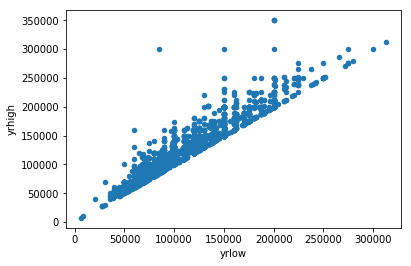

In [151]:
salparse.plot.scatter('yrlow', 'yrhigh')
plt.show()

/Users/pat.hearps/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/pat.hearps/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


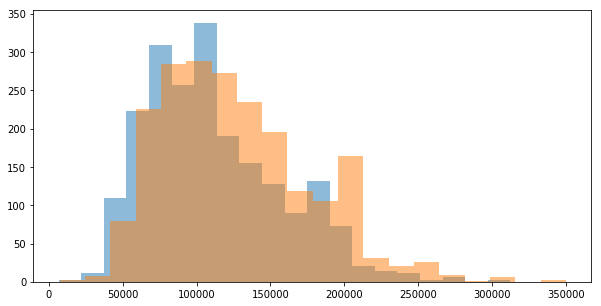

In [152]:
fig1, ax1 = plt.subplots(figsize=(10,5))

ax1.hist(data = salparse, x='yrlow', alpha=0.5, bins=20)
ax1.hist(data = salparse, x='yrhigh', alpha=0.5, bins=20)

plt.show()

In [153]:
salparse['salrange'] = salparse.yrhigh - salparse.yrlow
salparse['avg_sal'] = np.mean(salparse[['yrhigh','yrlow']], axis=1)
salparse.head()

,seekID,salary,cln,per,lowrange,uprange,numsal,check,multiplier,yrlow,yrhigh,salrange,avg_sal
3,38194336.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0,110172.0,119921.0,9749.0,115046.5
4,38194327.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0,110172.0,119921.0,9749.0,115046.5
5,38194322.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0,110172.0,119921.0,9749.0,115046.5
6,38194317.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0,110172.0,119921.0,9749.0,115046.5
7,38184716.0,"$110,172.00 - $119,921.00",110172 - 119921,pa,110172.0,119921.0,"[110172, 119921]",110172 -,1.0,110172.0,119921.0,9749.0,115046.5


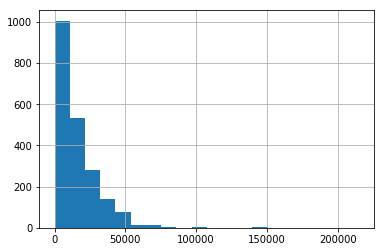

In [154]:
salparse.salrange.hist(bins=20)
plt.show()

In [155]:
salparse[salparse.salrange > 8e4] # fair enough, some really are $150K-$250K

,seekID,salary,cln,per,lowrange,uprange,numsal,check,multiplier,yrlow,yrhigh,salrange,avg_sal
294,38083218.0,$600 - $1k p.d.,600 - 1k p.d.,pd,600.0,1000.0,"[600, 1k]",600 -,250.0,150000.0,250000.0,100000.0,200000.0
1076,38226664.0,$150K + Super + $250K - $300K OTE,150k + super + 250k - 300k ote,pa,150000.0,250000.0,"[150k, 250k, 300k]",150k,1.0,150000.0,250000.0,100000.0,200000.0
1159,38144235.0,$30.00 - $80.00 p.h.,30 - 80 p.h.,ph,30.0,80.0,"[30, 80]",30 -,2000.0,60000.0,160000.0,100000.0,110000.0
1896,38284186.0,OTE $200-300k+ (Uncapped Commission),ote 200-300k+ (uncapped commission),pa,200000.0,300000.0,"[200, 300k]",200-,1.0,200000.0,300000.0,100000.0,250000.0
3444,38269409.0,"$130,000 - $220,000 package",130000 - 220000 package,pa,130000.0,220000.0,"[130000, 220000]",130000 -,1.0,130000.0,220000.0,90000.0,175000.0
5845,38150697.0,$800-$1400/day + GST,800-1400/day + gst,pd,800.0,1400.0,"[800, 1400]",800-,250.0,200000.0,350000.0,150000.0,275000.0
5899,38136486.0,$800-$1400/day + GST,800-1400/day + gst,pd,800.0,1400.0,"[800, 1400]",800-,250.0,200000.0,350000.0,150000.0,275000.0
6342,38173455.0,$800-$1400/day + GST,800-1400/day + gst,pd,800.0,1400.0,"[800, 1400]",800-,250.0,200000.0,350000.0,150000.0,275000.0
7321,38292959.0,$150k p.a. + Super + Uncapped Comms OTE $300K,150k p.a. + super + uncapped comms ote 300k,pa,150000.0,300000.0,"[150k, 300k]",150k,1.0,150000.0,300000.0,150000.0,225000.0
7925,38124477.0,"$85,000 - $300,000",85000 - 300000,pa,85000.0,300000.0,"[85000, 300000]",85000 -,1.0,85000.0,300000.0,215000.0,192500.0


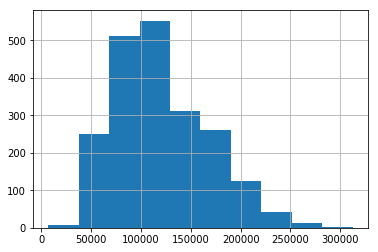

In [156]:
salparse.avg_sal.hist()
plt.show()     # looks good

In [157]:
final = pd.merge(jobdf, salparse[['yrlow','yrhigh', 'salrange', 'avg_sal']], how='left', left_index=True, right_index=True, )
final

,company,error,joburl,location_area,location_big,salary,searchterm,seekID,srch_date,srch_pos,templatetext,title,jobClassification,jobSubClassification,jobTitle,yrlow,yrhigh,salrange,avg_sal
0,FIRESOFT Consulting,nobullets,/job/38248336?type=standard&searchrequesttoken...,"CBD, Inner West & Eastern Suburbs",Sydney,not_listed,data-science,38248336.0,20190202.0,1_0,\nHead of Data Science Engineering & Products ...,Head of Data Science Engineering & Products,Information & Communication Technology,Management,Head of Data Science Engineering & Products,NaN,NaN,NaN,NaN
1,Bluefin Resources Pty Limited,nobullets,/job/38214944?type=standard&searchrequesttoken...,"CBD, Inner West & Eastern Suburbs",Sydney,not_listed,data-science,38214944.0,20190202.0,1_1,\nMy client is a leading institution with ongo...,Manager | Analytics & Data Science,Science & Technology,"Mathematics, Statistics & Information Sciences",Manager | Analytics & Data Science,NaN,NaN,NaN,NaN
2,GOW Recruitment,nobullets,/job/38196050?type=standard&searchrequesttoken...,not_listed,Melbourne,not_listed,data-science,38196050.0,20190202.0,1_3,\nExpressions of Interests Recruiting for mult...,"Data Science, Data Engineers, Data Analytics -...",Information & Communication Technology,Other,"Data Science, Data Engineers, Data Analytics -...",NaN,NaN,NaN,NaN
3,AUSTRALIAN FEDERAL POLICE,nobullets,/job/38194336?type=standout&searchrequesttoken...,CBD & Inner Suburbs,Melbourne,"$110,172.00 - $119,921.00",data-science,38194336.0,20190202.0,1_4,\nThe mission of the AFP is to provide dynamic...,Data Analytics & Data Science Team Leader,NaN,NaN,NaN,110172.0,119921.0,9749.0,115046.5
4,AUSTRALIAN FEDERAL POLICE,nobullets,/job/38194327?type=standout&searchrequesttoken...,CBD & Inner Suburbs,Brisbane,"$110,172.00 - $119,921.00",data-science,38194327.0,20190202.0,1_5,\nThe mission of the AFP is to provide dynamic...,Data Analytics & Data Science Team Leader,NaN,NaN,NaN,110172.0,119921.0,9749.0,115046.5
5,AUSTRALIAN FEDERAL POLICE,nobullets,/job/38194322?type=standout&searchrequesttoken...,not_listed,ACT,"$110,172.00 - $119,921.00",data-science,38194322.0,20190202.0,1_6,\nThe mission of the AFP is to provide dynamic...,Data Analytics & Data Science Team Leader,NaN,NaN,NaN,110172.0,119921.0,9749.0,115046.5
6,AUSTRALIAN FEDERAL POLICE,nobullets,/job/38194317?type=standout&searchrequesttoken...,"CBD, Inner West & Eastern Suburbs",Sydney,"$110,172.00 - $119,921.00",data-science,38194317.0,20190202.0,1_7,\nThe mission of the AFP is to provide dynamic...,Data Analytics & Data Science Team Leader,NaN,NaN,NaN,110172.0,119921.0,9749.0,115046.5
7,AUSTRALIAN FEDERAL POLICE,nobullets,/job/38184716?type=standout&searchrequesttoken...,CBD & Inner Suburbs,Melbourne,"$110,172.00 - $119,921.00",data-science,38184716.0,20190202.0,1_8,\nThe mission of the AFP is to provide dynamic...,Data Analytics & Data Science Team Leader,NaN,NaN,NaN,110172.0,119921.0,9749.0,115046.5
8,AUSTRALIAN FEDERAL POLICE,nobullets,/job/38184709?type=standout&searchrequesttoken...,not_listed,ACT,"$110,172.00 - $119,921.00",data-science,38184709.0,20190202.0,1_9,\nThe mission of the AFP is to provide dynamic...,Data Analytics & Data Science Team Leader,NaN,NaN,NaN,110172.0,119921.0,9749.0,115046.5
9,AUSTRALIAN FEDERAL POLICE,nobullets,/job/38184701?type=standout&searchrequesttoken...,"CBD, Inner West & Eastern Suburbs",Sydney,"$110,172.00 - $119,921.00",data-science,38184701.0,20190202.0,1_10,\nThe mission of the AFP is to provide dynamic...,Data Analytics & Data Science Team Leader,NaN,NaN,NaN,110172.0,119921.0,9749.0,115046.5


In [158]:
dttoday = pd.to_datetime('today').strftime("%Y%m%d")
final.to_csv(f'{dttoday}_jobs_parsed_salaries_avg_classf.csv')

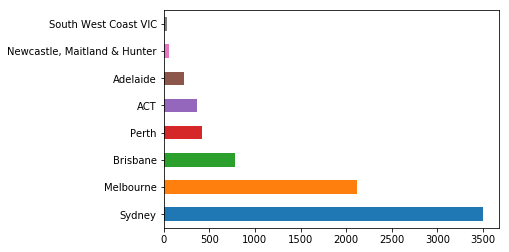

In [117]:
# jobdf.location_big.value_counts()[:8].plot(kind='barh')